# torch转ONNX：Upsample

In [13]:
%cd ../../..
import set_env
from d2py.utils.file import mkdir
temp_dir = ".temp"
mkdir(temp_dir)

/media/pc/data/lxw/ai/tvm-book/doc/tutorials/frontend


In [1]:
import torch
from torch import nn

In [4]:
nn.Upsample?

Init signature:
nn.Upsample(
    size: Union[int, Tuple[int, ...], NoneType] = None,
    scale_factor: Union[float, Tuple[float, ...], NoneType] = None,
    mode: str = 'nearest',
    align_corners: Optional[bool] = None,
    recompute_scale_factor: Optional[bool] = None,
) -> None
Docstring:     
Upsamples a given multi-channel 1D (temporal), 2D (spatial) or 3D (volumetric) data.

The input data is assumed to be of the form
`minibatch x channels x [optional depth] x [optional height] x width`.
Hence, for spatial inputs, we expect a 4D Tensor and for volumetric inputs, we expect a 5D Tensor.

The algorithms available for upsampling are nearest neighbor and linear,
bilinear, bicubic and trilinear for 3D, 4D and 5D input Tensor,
respectively.

One can either give a :attr:`scale_factor` or the target output :attr:`size` to
calculate the output size. (You cannot give both, as it is ambiguous)

Args:
    size (int or Tuple[int] or Tuple[int, int] or Tuple[int, int, int], optional):
        

将给定的多通道 1D（时间）、2D（空间）或 3D（体积）数据进行上采样。

输入数据被假定为 `minibatch x channels x [可选深度] x [可选高度] x 宽度` 的形式。因此，对于空间输入，我们期望 4D 张量；对于体积输入，我们期望 5D 张量。

可用的上采样算法包括最近邻和线性、双线性、三次线性以及针对 3D、4D 和 5D 输入张量的三线性插值。

可以给出 {attr}`scale_factor`（缩放因子）或目标输出大小来计算输出大小。(两者不能同时给出，因为这样会产生歧义)

参数：

- `size` (`int` 或 `Tuple[int]` 或 `Tuple[int, int]` 或 `Tuple[int, int, int]`, 可选) – 输出空间大小
- `scale_factor` (float或 `Tuple[float]` 或 `Tuple[float, float]` 或 `Tuple[float, float, float]`, 可选) – 空间大小的乘数。如果是元组，则必须与输入大小匹配。
- `mode` (`str`, 可选) – 上采样算法：`'nearest'`（最近邻）、`'linear'`（线性）、`'bilinear'`（双线性）、`'bicubic'`（三次）和 `'trilinear'`（三线性）中的一种。默认值： `'nearest'`
- `align_corners` (`bool`, 可选) – 如果为 `True`，则输入和输出张量的角像素对齐，从而保留这些像素的值。这只在模式为 `'linear'`、`'bilinear'`、`'bicubic'` 或 `'trilinear'` 时有效。默认值： `False`
- `recompute_scale_factor` (`bool`, 可选) – 重新计算用于插值计算的 `scale_factor`。如果 `recompute_scale_factor` 为 `True`，则必须传入 `scale_factor`，并且使用 `scale_factor` 来计算输出大小。计算出的输出大小将用于推断插值的新比例。请注意，当 `scale_factor` 为浮点数时，由于舍入和精度问题，它可能与重新计算的 `scale_factor` 不同。如果 `recompute_scale_factor` 为 `False`，则直接使用 `size` 或 `scale_factor` 进行插值。

- 输入：$(N, C, W_{in})$、$(N, C, H_{in}, W_{in})$ 或者 $(N, C, D_{in}, H_{in}, W_{in})$
- 输出：$(N, C, W_{out})$、$(N, C, H_{out}, W_{out})$ 或者 $(N, C, D_{out}, H_{out}, W_{out})$

```{warning}
当 `align_corners` 为 `True` 时，线性插值模式（`linear`、`bilinear`、`bicubic` 和 `trilinear`）不会按比例对齐输出和输入像素，因此输出值可能依赖于输入大小。在版本 0.3.1 之前，这些模式的默认行为就是这样的。从那时起，默认行为变为 `align_corners = False`。具体示例请见下文，了解这如何影响输出。
```

```{tip}
如果你想进行下采样/一般重采样，你应该使用 {func}`interpolate` 函数。
```

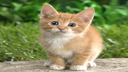

In [59]:
from PIL import Image
import numpy as np

im = Image.open("../vta/tests/cat.jpg").resize((128, 72))
im

In [60]:
x = np.array(im, dtype="float32")
x = np.expand_dims(x.transpose((2, 0, 1)), axis=0)
x.shape

(1, 3, 72, 128)

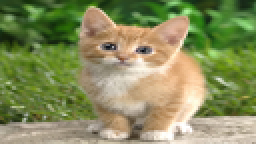

In [61]:
m = nn.Upsample(scale_factor=2, mode='nearest')
y = m(torch.from_numpy(x)).numpy()[0].transpose((1, 2, 0)).astype("uint8")
Image.fromarray(y)

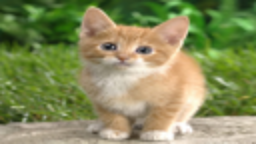

In [62]:
m = nn.Upsample(scale_factor=2, mode='bilinear')  # align_corners=False
y = m(torch.from_numpy(x)).numpy()[0].transpose((1, 2, 0)).astype("uint8")
Image.fromarray(y)

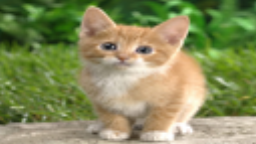

In [63]:
m = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
y = m(torch.from_numpy(x)).numpy()[0].transpose((1, 2, 0)).astype("uint8")
Image.fromarray(y)

In [64]:
import tvm

In [66]:
tvm.topi.shape??

Signature: tvm.topi.shape(array, dtype='int32')
Source:   
def shape(array, dtype="int32"):
    """Get the shape of input array

    Parameters
    ----------
    array : tvm.te.Tensor
        The source tensor.

    dtype : str, optional
        The target data type.

    Returns
    -------
    result : tvm.te.Tensor
        The resulting tensor.
    """
    return cpp.shape(array, dtype)
File:      /media/pc/data/lxw/ai/tvm/python/tvm/topi/transform.py
Type:      function